# US Police Shooting Analysis

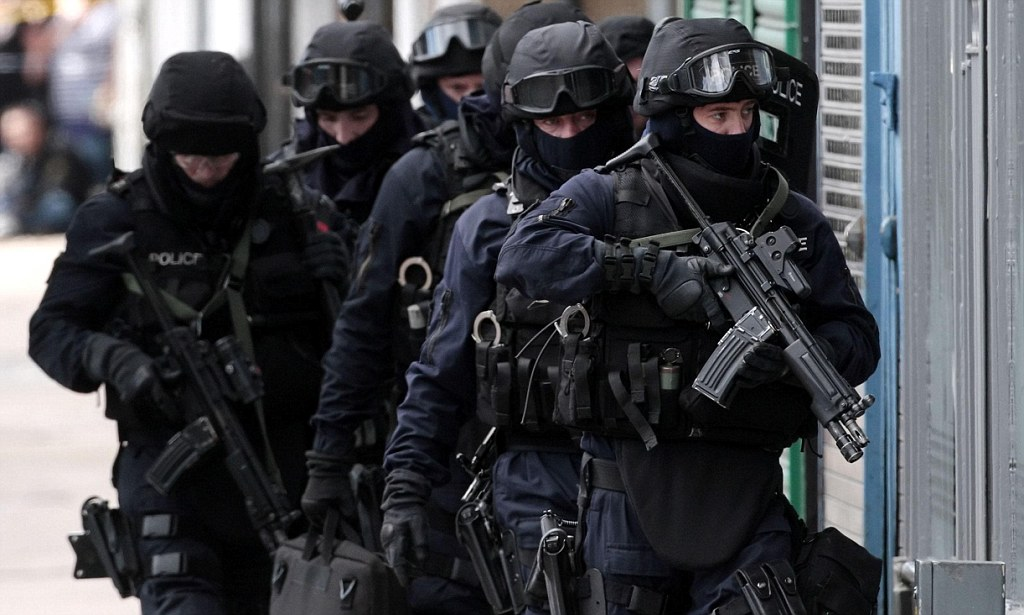

<h1> Objective </h1>
<p>The aim of this kernal is to provide a visualisation and analysis of US Police Shooting dataset from 2015-2020.</p>

**<h3 style="color:brown;">Please Upvote my kernel if you think it is helpful and liked my work.</h3>**

In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import pandas_profiling
import datetime as dt
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt

## Table of content

* Reading required dataset.
* Visualisation using Pandas Profiling.
* VISUALISATION
 1. Shooting VS Year
 *  Shooting in different months as compared to years
 *  Shooting with respect to week days
 *  Number of Shootings differentiated by gender, flee, mental illness and manner of death.
 *  Top 10 most used armed used while shooting
 *  Distribution of shooted person Age
 *  US Police Shooting States(2015-2020)
 *  Number of Shooting every year comparing with month
 *  Top 15 Cities where most Shooting Encountered
 *  Used Armed Categories by US Police

## Reading Dataset

In [ ]:
data = pd.read_csv('../input/us-police-shootings/shootings.csv')
del data['id']
data.head()

### In Data Analysis We will Analyze To Find out the below stuff
* Missing Values
* Types of Variables and Conversion
* All The Numerical Variables
* Distribution of the Numerical Variables
* Categorical Variables
* Cardinality of Categorical Variables
* Outliers

## Missing values

In [ ]:
data.isna().sum()

## Types of Variables

In [ ]:
data.dtypes

In [ ]:
data['date'] = pd.to_datetime(data['date'])

### Adding new columns for data visualisation purpose

In [ ]:
df = data.copy()
df['death'] = 1 

df['date'] = pd.to_datetime(data['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

## All The Numerical Variables

In [ ]:
num_var = []

for col in df.columns:
    if df[col].dtype != 'O':
        num_var.append(col)

In [ ]:
df[num_var].head()

In [ ]:
df['year-month'] = df['date'].map(lambda x: x.strftime('%Y-%m'))
df1 = df.groupby('year-month').count().reset_index()[['year-month','death']]

fig = go.Figure(go.Bar(
    x=df1['year-month'],y=df1['death'],
    marker={'color': df1['death'], 
    'colorscale': 'Viridis'},  
    text=df1['death'],
    textposition = "outside",
))
fig.update_layout(title_text='No of deaths (2015-2020)',yaxis_title="no. of deaths", xaxis_title="Months with Year")
fig.show()

## Distribution of the Numerical Variables

In [ ]:
working_col = ['date', 'manner_of_death', 'armed','age', 'gender','race','city', 'state', 'signs_of_mental_illness',
              'threat_level', 'flee', 'body_camera', 'arms_category']
week_day_dict = {0:'Sun',
                1: 'Mon',
                2: 'Tue',
                3: 'Wed',
                4: 'Thrus',
                5: 'Fri',
                6: 'Sat'}
month_dict = {1:'Jan', 
              2: 'Feb',
              3: 'Mar',
              4: 'Apr',
              5: 'May',
              6: 'Jun',
              7: 'Jul',
              8: 'Aug',
              9: 'Sept',
              10: 'Oct',
              11: 'Nov',
              12: 'Dec',
             }

## VISUALISATION

### Shooting VS Year

In [ ]:
shooting_per_year = working_df['year'].unique()
year_count = working_df['year'].value_counts().sort_index().values

fig = go.Figure(go.Bar(
    x=shooting_per_year ,y=year_count, 
    marker={ 'color': shooting_per_year, 
             'colorscale': 'Viridis'},  
    text=year_count,
    textposition = "outside",
))
fig.update_layout(title_text='Number of Shooting per Year',xaxis_title="Year",yaxis_title="Number of Shootings", width=700)
fig.show()

### Remark
* The shooting frequency decrease by year

### Shooting in different months as compared to years

In [ ]:
temp_df = working_df[['month','year','death']].groupby(['month', 'year']).count()
temp_df.rename(columns={'death':'deaths'},inplace=True)
temp_df.reset_index(inplace=True)

fig = make_subplots(rows=4, cols=3,
                   subplot_titles=(list(month_dict.values())))  # Subplot titles

for month in range(1,13):
    df = temp_df[temp_df['month']==month]
    row=((month-1) // 3 )+1
    col = (month) - (row-1)*3
    
    fig.add_trace(go.Bar(
                        x=temp_df['year'],
                        y=df['deaths'],
                        name=month,  
                    ), 
                    row=row, col=col
                 )
 

fig.update_layout(height=1600, title_text="Month ")
fig.show()

### Remark
* Comparing the data from last 2-3 years the shooting gone done except for oct-dec months

### Shooting with respect to week days

In [ ]:
df = working_df[['week_day','death']].groupby('week_day').count().rename(columns={'death':'death'})
df.index = df.index.map(week_day_dict)

fig = go.Figure(go.Bar(
    x=df.index,y=df['death'],
    marker={'color': df['death'], 
    'colorscale': 'Viridis'},  
    text=df['death'],
    textposition = "outside",
))
fig.update_layout(title_text='Shooting with respect to week days',xaxis_title="Shooting Count",yaxis_title="Week Days", width=700)
fig.show()

### Number of Shootings differentiated by gender, flee, mental illness and manner of death.

In [ ]:
df = working_df[['gender','signs_of_mental_illness','manner_of_death','flee','death']].groupby(['gender','signs_of_mental_illness','manner_of_death','flee']).agg('count').reset_index()
df = df.rename(columns={'death':'death'})

fig = px.bar(df, x="gender",y='death', color="manner_of_death",barmode="group",
             facet_row="signs_of_mental_illness", facet_col="flee",
             )
fig.update_layout(title_text='Number of Shootings differentiated by gender, flee, mental illness and manner of death.', height=700)
fig.show()

### Remark
* It is clearly visable that not-fleeing male are been shotted most
* The mental criminals are less affected

### Top 10 most used armed used while shooting

In [ ]:
df = working_df.armed.value_counts()[:12].to_frame()
df.drop(['unknown', 'unarmed'], inplace=True)
df.reset_index(inplace=True)
df.rename(columns={'index':'armed', 'armed':'count'},inplace=True)

fig = go.Figure(go.Bar(
    x=df['armed'], y=df['count'],
    marker={'color': df['count'], 
    'colorscale': 'Viridis'},  
    text=df['count'].astype(str),
    textposition = "outside",
))
fig.update_layout(title_text='Top 10 most used armed used while shooting',xaxis_title="Armed",yaxis_title="Number of Shooting")
fig.show()

### Remark
* Guns are most used follwed by knife

### Distribution of shooted person Age

In [ ]:
fig = go.Figure(data=[go.Histogram(x=working_df['age'], 
                                  marker_color="green",
                      xbins=dict(
                      start=0,
                      end=100, 
                      size=10   
                      ))])
fig.update_layout(title="Distribution of shooted person Age",xaxis_title="Age",yaxis_title="Counts", width=600)
fig.show()

### US Police Shooting States(2015-2020)

In [ ]:
df = df[['state','death']].groupby('state').agg('count').reset_index()

fig = go.Figure(go.Choropleth(
    locations=df['state'],
    z=df['death'].astype(int),
    locationmode='USA-states',
    colorscale='Reds',
    autocolorscale=False,
    text=df['state'],
    marker_line_color='black', 
    showscale = False,
))
fig.update_layout(
    title_text='US Police Shooting States (2015-2020)',
    title_x=0.5,
    geo = dict(
        scope='usa',
        projection=go.layout.geo.Projection(type = 'albers usa'),
        showlakes=False, # lakes
        lakecolor='rgb(255, 255, 255)'))
fig.update_layout(
    template="plotly_dark", width=1000)
fig.show()

### Number of Shooting every year comparing with month

In [ ]:
df = working_df[['month','year', 'death']].groupby(['year', 'month']).agg('count').reset_index()
df.month = df.month.map(month_dict)
colors = ['yellow','green','purple','gold','orange', 'red']

fig = go.Figure()
for i in df.year.unique():
    w_df = df[df['year']==i]
    fig.add_trace(go.Scatter(x=list(month_dict.values()), y=w_df['death'], name = str(i),
                line=dict(color=colors[i-2015], width=4)))
    
    
fig.update_layout(title='Number of Shooting every year comparing with month',xaxis_title="Months",yaxis_title="Number of Shoot")
fig.show()

### Top 15 Cities where most Shooting Encountered

In [ ]:
df = working_df.city.value_counts()[:15].to_frame().reset_index().rename(columns={'index':'city', 'city':'deaths'})

fig = go.Figure(go.Bar(
    x=df['city'],y=df['deaths'],
    marker={'color': df['deaths'], 
    'colorscale': 'Reds'},  
    text=df['deaths'],
    textposition = "outside",
))
fig.update_layout(title_text='Top 15 Cities where most Shooting Encountered',xaxis_title="City",yaxis_title="Number of Deaths",
                 width=700)
fig.show()

### Used Armed Categories by US Police

In [ ]:
df = working_df['arms_category'].value_counts().to_frame().reset_index().rename(columns={'index':'arms_category', 'arms_category':'count'})

fig = go.Figure([go.Pie(labels=df['arms_category'], values=df['count']
                        ,hole=0.3)])  # can change the size of hole 

fig.update_traces(hoverinfo='label+percent', textinfo='percent', textfont_size=15)
fig.update_layout(title="Used Arms Categories",title_x=0.5)
fig.show()

**<h2 style="color:brown;">Please Upvote my kernel if you think it is helpful and liked my work.</h2>**